In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Sheltown 

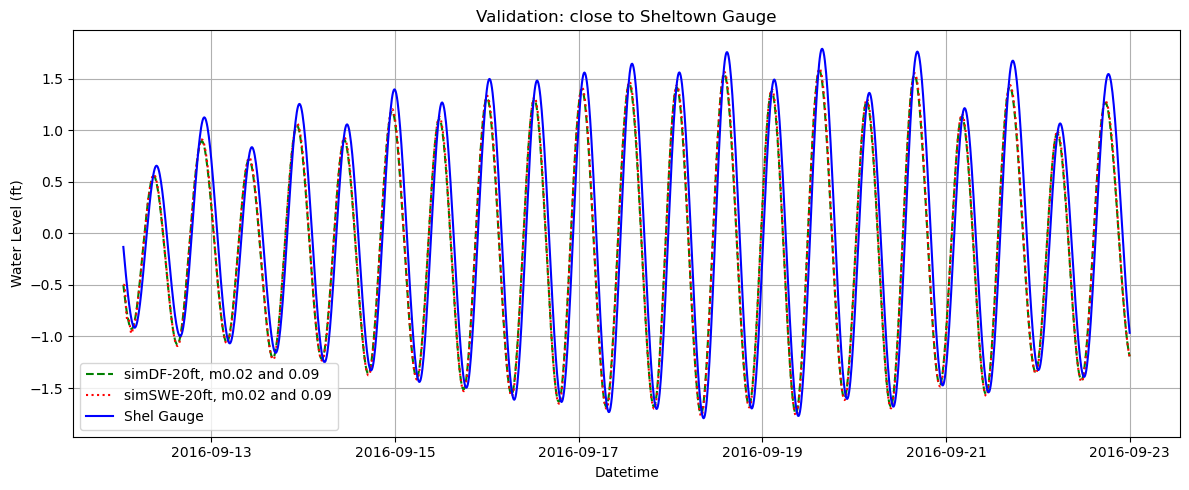

In [35]:
# Compare to Shelltown

# === Path to your Excel file ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\Coastal validation.xlsx"  # geometry 5.1.1

# === Load Data ===
df_cross1 = pd.read_excel(excel_path, sheet_name='Cross1')
df_shel = pd.read_excel(excel_path, sheet_name='Shel')

# === Clean column names ===
df_cross1.columns = df_cross1.columns.str.strip()
df_shel.columns = df_shel.columns.str.strip()

# === Convert datetime ===
df_cross1['Datetime'] = pd.to_datetime(df_cross1['Datetime'])
df_shel['Datetime'] = pd.to_datetime(df_shel['Datetime'])

# === SELECT DATE RANGE ===
start_date = "2016-09-12"
end_date = "2016-09-23"

# === Filter both DataFrames to the same date range ===
df_cross1_filtered = df_cross1[(df_cross1['Datetime'] >= start_date) & (df_cross1['Datetime'] <= end_date)]
df_shel_filtered = df_shel[(df_shel['Datetime'] >= start_date) & (df_shel['Datetime'] <= end_date)]

# === Merge DataFrames on Datetime to keep only common timestamps ===
df_merged = pd.merge(
    df_cross1_filtered[['Datetime', 'simDF', 'simSWE']],
    df_shel_filtered[['Datetime', 'WaterLevel_ft']],
    on='Datetime', how='inner'
)

# === Plot ===
plt.figure(figsize=(12, 5))
plt.plot(df_merged['Datetime'], df_merged['simDF'], label='simDF-20ft, m0.02 and 0.09', linestyle='--', color='green')
plt.plot(df_merged['Datetime'], df_merged['simSWE'], label='simSWE-20ft, m0.02 and 0.09', linestyle=':', color='red')
plt.plot(df_merged['Datetime'], df_merged['WaterLevel_ft'], label='Shel Gauge', linestyle='-', color='blue')

# # === Add metrics text inside plot ===
# plt.text(0.01, 0.95,
#          f'Bias = {bias:.3f} ft\nRMSE = {rmse:.3f} ft\nMAE = {mae:.3f} ft\nR² = {r2:.3f}',
#          transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
#          bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8))

plt.title("Validation: close to Sheltown Gauge")
plt.xlabel("Datetime")
plt.ylabel("Water Level (ft)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\dveronez\AppData\Local\Temp\ipykernel_66328\3802270219.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_merged['simDF'], df_merged['simSWE'], df_merged['WaterLevel_ft']],


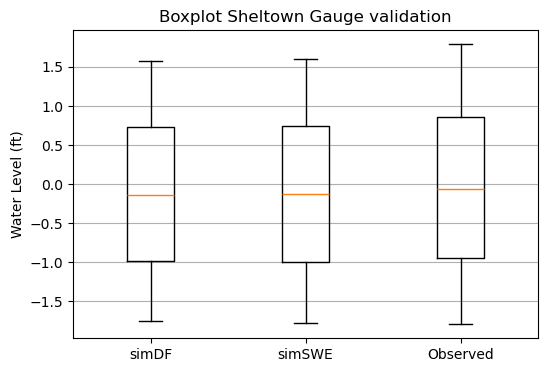

In [37]:
plt.figure(figsize=(6, 4))
plt.boxplot([df_merged['simDF'], df_merged['simSWE'], df_merged['WaterLevel_ft']],
            labels=['simDF', 'simSWE', 'Observed'])
plt.ylabel('Water Level (ft)')
plt.title('Boxplot Sheltown Gauge validation')
plt.grid(True, axis='y')
plt.show()

In [14]:
# Step 1: Extract the relevant columns from df_merged
simDF1 = df_merged['simDF']
obs = df_merged['WaterLevel_ft']

# Step 2: Calculate the squared differences
squared_diff = (simDF1 - obs) ** 2

# Step 3: Compute the mean of the squared differences
mse = squared_diff.mean()

# Step 4: Take the square root to get RMSE
rmse = np.sqrt(mse)

print(f"RMSE for simDF vs WaterLevel_ft: {rmse:.3f} ft")


# Calculate Nash-Sutcliffe Efficiency (NSE)
nse1 = 1 - ((simDF1 - obs).pow(2).sum() / (obs - obs.mean()).pow(2).sum())
print(f"NSE for simDF vs WaterLevel_ft: {nse1:.3f}")

RMSE for simDF vs WaterLevel_ft: 0.367 ft
NSE for simDF vs WaterLevel_ft: 0.868


In [15]:
# Step 1: Extract the relevant columns from df_merged
simSWE1 = df_merged['simSWE']
obs = df_merged['WaterLevel_ft']

# Step 2: Calculate the squared differences
squared_diff = (simSWE1 - obs) ** 2

# Step 3: Compute the mean of the squared differences
mse = squared_diff.mean()

# Step 4: Take the square root to get RMSE
rmse = np.sqrt(mse)

print(f"RMSE for simDF vs WaterLevel_ft: {rmse:.3f} ft")

# Calculate Nash-Sutcliffe Efficiency (NSE)
nse2 = 1 - ((simSWE1 - obs).pow(2).sum() / (obs - obs.mean()).pow(2).sum())
print(f"NSE for simSWE vs WaterLevel_ft: {nse2:.3f}")

RMSE for simDF vs WaterLevel_ft: 0.349 ft
NSE for simSWE vs WaterLevel_ft: 0.881


# Snow


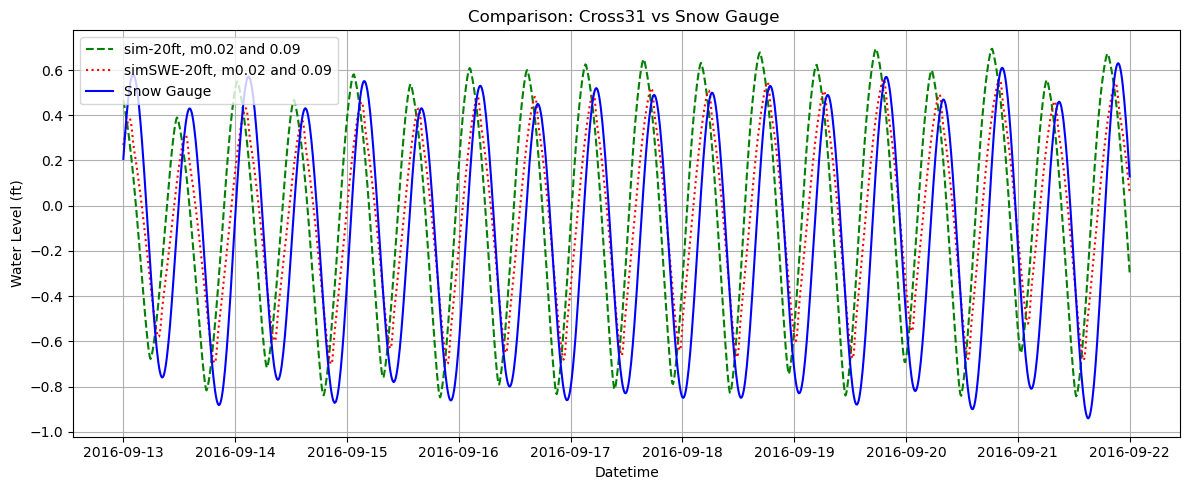

In [38]:
# Compare to Snow hill + bias


# === Path to your Excel file ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\Coastal validation.xlsx"  # geometry 5.1.1

# === Load Data ===
df_cross31 = pd.read_excel(excel_path, sheet_name='Cross 31')
df_snow = pd.read_excel(excel_path, sheet_name='Snow')

# === Clean column names ===
df_cross31.columns = df_cross31.columns.str.strip()
df_snow.columns = df_snow.columns.str.strip()

# === Convert datetime ===
df_cross31['Datetime'] = pd.to_datetime(df_cross31['Datetime'])
df_snow['Datetime'] = pd.to_datetime(df_snow['Datetime'])

# === SELECT DATE RANGE ===
start_date = "2016-09-13"
end_date = "2016-09-22"

# === Filter both DataFrames to the same date range ===
df_cross31_filtered = df_cross31[(df_cross31['Datetime'] >= start_date) & (df_cross31['Datetime'] <= end_date)]
df_snow_filtered = df_snow[(df_snow['Datetime'] >= start_date) & (df_snow['Datetime'] <= end_date)]

# === Merge DataFrames on Datetime to keep only common timestamps ===
df_merged = pd.merge(
    df_cross31_filtered[['Datetime', 'simDF', 'simSWE']],
    df_snow_filtered[['Datetime', 'WaterLevel_ft']],
    on='Datetime', how='inner'
)

# === Plot ===
plt.figure(figsize=(12, 5))
plt.plot(df_merged['Datetime'], df_merged['simDF'], label='sim-20ft, m0.02 and 0.09', linestyle='--', color='green')
plt.plot(df_merged['Datetime'], df_merged['simSWE'], label='simSWE-20ft, m0.02 and 0.09', linestyle=':', color='red')
plt.plot(df_merged['Datetime'], df_merged['WaterLevel_ft'], label='Snow Gauge', linestyle='-', color='blue')


plt.title("Comparison: Cross31 vs Snow Gauge ")
plt.xlabel("Datetime")
plt.ylabel("Water Level (ft)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\dveronez\AppData\Local\Temp\ipykernel_66328\4196993256.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_merged['simDF'], df_merged['simSWE'], df_merged['WaterLevel_ft']],


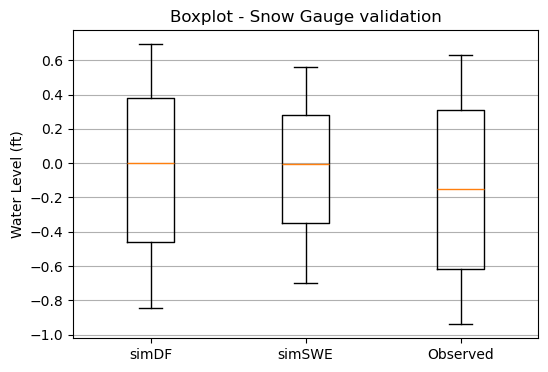

In [39]:
plt.figure(figsize=(6, 4))
plt.boxplot([df_merged['simDF'], df_merged['simSWE'], df_merged['WaterLevel_ft']],
            labels=['simDF', 'simSWE', 'Observed'])
plt.ylabel('Water Level (ft)')
plt.title('Boxplot - Snow Gauge validation')
plt.grid(True, axis='y')
plt.show()